- try to simulate the system of projectile motion with drag force

Drag force = 0.5 * density(air) * A(พื้นที่หน้าตัดของวัตถุ) * Cd(drag coefficient) * v*v

imagine object = cube 1*1*1m
cd = 1.05

In [29]:
import matplotlib.pyplot as plt
import math

In [30]:
class System:
    def __init__(self, angle):
        # initial condition
        self.x = 0
        self.y = 0
        self.u = 20
        self.g = 9.8
        self.m = 10
        self.t = 0

        #object part
        self.size = 1 # cube
        self.a = self.size**2 # พื้นที่หน้าตัด
        self.cd = 1.05

        # only this system
        self.h = 0.001
        self.angle = math.radians(angle)

        #force part
        self.fy = -self.m*self.g
        self.fx = 0

        #velocity part
        self.ux = self.u*math.cos(self.angle)
        self.uy = self.u*math.sin(self.angle)

    def calDrag(self):
        self.fd = 0.5*1.2754*(self.a)*self.cd*self.u*self.u #drag force
        self.fdX = -(self.ux/self.u)*self.fd
        self.fdY = -(self.uy/self.u)*self.fd

    def updateF(self):
        self.fx = self.fdX
        self.fy = (-self.m*self.g) + self.fdY

    def updateX(self):
        self.x = self.x + (self.ux*self.h) + (0.5*(self.fx/self.m)*(self.h**2))

    def updateY(self):
        self.y = self.y + (self.uy*self.h) + (0.5*(self.fy/self.m)*(self.h**2))

    def updateU(self):
        self.ux = self.ux + ((self.fx/self.m)*self.h)
        self.uy = self.uy + ((self.fy/self.m)*self.h)

    def updateT(self):
        self.t += self.h

In [31]:
xPos = []
yPos = []
tList = []

s = System(60)

while s.y >= 0:
    xPos.append(s.x)
    yPos.append(s.y)
    tList.append(s.t)

    s.updateU()
    s.calDrag()
    s.updateF()
    s.updateX()
    s.updateY()
    s.updateT()

In [32]:
yPos

[0,
 0.017294217085221913,
 0.03455547427374982,
 0.05178381570448855,
 0.06897928545723347,
 0.08614192755274962,
 0.1032717859528507,
 0.12036890456047813,
 0.13743332721977977,
 0.15446509771618877,
 0.1714642597765021,
 0.1884308570689591,
 0.20536493320331997,
 0.222266531730944,
 0.23913569614486777,
 0.25597246987988337,
 0.27277689631261626,
 0.28954901876160316,
 0.3062888804873701,
 0.3229965246925097,
 0.33967199452175917,
 0.35631533306207736,
 0.37292658334272255,
 0.3895057883353294,
 0.4060529909539863,
 0.42256823405531235,
 0.4390515604385344,
 0.4555030128455638,
 0.47192263396107337,
 0.48831046641257364,
 0.5046665527704898,
 0.5209909355482379,
 0.5372836572023016,
 0.5535447601323079,
 0.5697742866811035,
 0.5859722791348307,
 0.6021387797230036,
 0.6182738306185838,
 0.6343774739380561,
 0.6504497517415044,
 0.6664907060326867,
 0.6825003787591108,
 0.6984788118121099,
 0.7144260470269174,
 0.7303421261827423,
 0.746227091002844,
 0.7620809831546077,
 0.777903844

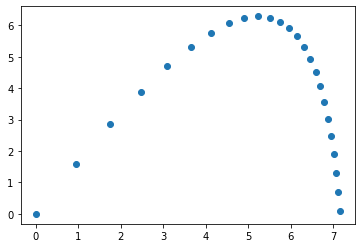

In [34]:
plt.scatter(xPos[::100], yPos[::100])